In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [221]:
cares = pd.read_csv("../data/CARES_continuous.csv")
cares

,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
0,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
1,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
2,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
3,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,1,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
4,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78860,81,FEMALE,0.0,none,57.609630,G3a,NaN,NO,0,0,...,no,no,no,no,no,G3,NaN,<= 15.7,II,no
78861,46,MALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,yes,#NULL!,#NULL!,#NULL!,III,no
78862,66,FEMALE,2.0,mild,48.339582,G3a,NaN,NO,0,0,...,no,no,no,yes,no,G3,Mild,<= 15.7,II,no
78863,50,MALE,1.0,moderate,126.592489,g1,NaN,NO,0,0,...,no,no,no,yes,no,G1,Moderate/Severe,<= 15.7,#NULL!,no


In [215]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [222]:
# features are those that are continuous
days_significant_columns = [
    'PreopEGFRMDRD',
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]

days_cares = cares[days_significant_columns + ['DaysbetweenDeathandoperation']]

In [224]:
days_cares = days_cares.dropna(subset=['PreopEGFRMDRD','DaysbetweenDeathandoperation'])
# dont drop first

In [225]:
def check_missing_values(df):
    """
    This function checks for missing values in each column of a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing values.
    
    Returns:
    pandas.DataFrame: A DataFrame containing the count and percentage of missing values for each column.
    """
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    
    return missing_df

check_missing_values(days_cares)

,Missing Values,Percentage
PreopEGFRMDRD,0,0.0
Preoptransfusionwithin30days,0,0.0
Intraop,0,0.0
Postopwithin30days,0,0.0
Transfusionintraandpostop,0,0.0
DaysbetweenDeathandoperation,0,0.0


78865 - 73274 = 5,591

In [226]:
days_cares.shape

(5371, 6)

In [227]:
days_cares.head()

,PreopEGFRMDRD,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation
4,98.651255,0,0,0,0,59.0
45,95.849232,0,0,0,0,1063.0
103,102.832998,0,0,0,0,793.0
107,99.129633,0,0,0,0,17.0
108,107.520574,0,0,0,0,433.0


Check if features need rescaling

In [147]:
days_cares['AGEcategory'].value_counts()

AGEcategory
2    1741
3    1546
4    1215
1     465
5     364
0      42
Name: count, dtype: int64

In [148]:
days_cares['PreopEGFRMDRD'].value_counts()

PreopEGFRMDRD
112.382587    6
96.448454     5
103.500168    5
83.071515     4
108.871038    4
             ..
122.038330    1
32.114377     1
109.175965    1
269.023482    1
177.230873    1
Name: count, Length: 4444, dtype: int64

Check deeper for PreopEGFRMDRD

In [149]:
days_cares['PreopEGFRMDRD'].describe()

count    5373.000000
mean       78.585733
std        52.249525
min         2.541026
25%        39.380409
50%        76.907395
75%       107.464507
max       588.466578
Name: PreopEGFRMDRD, dtype: float64

In [150]:
days_cares['Preoptransfusionwithin30days'].value_counts()

Preoptransfusionwithin30days
0.0     4773
1.0      272
2.0      146
3.0       71
4.0       32
5.0       22
7.0       17
8.0       12
6.0       12
11.0       4
14.0       3
10.0       2
9.0        2
13.0       2
17.0       1
12.0       1
21.0       1
Name: count, dtype: int64

In [151]:
days_cares['Intraop'].value_counts()

Intraop
0.0    4180
1.0    1193
Name: count, dtype: int64

In [152]:
days_cares['Postopwithin30days'].value_counts()

Postopwithin30days
0.0     5029
1.0      192
2.0       67
3.0       32
5.0       14
4.0       12
6.0        8
7.0        8
8.0        4
9.0        3
15.0       1
12.0       1
23.0       1
10.0       1
Name: count, dtype: int64

In [154]:
days_cares['Transfusionintraandpostop'].value_counts()

Transfusionintraandpostop
0.0     4176
1.0      855
2.0      192
3.0       65
4.0       32
6.0       14
5.0       12
7.0        8
8.0        8
9.0        4
10.0       3
16.0       1
13.0       1
24.0       1
11.0       1
Name: count, dtype: int64

From the above, PreopEGFRMDRD needs to be normalized as the range is significantly different from the rest

In [228]:
#use domain scaler to fit into range of other features since they share a common range from 0 to 24

days_cares['PreopEGFRMDRD'] = (days_cares['PreopEGFRMDRD']-0)/(24-0)
print('DomainScaler:\n{}'.format(days_cares['PreopEGFRMDRD'].describe()))

DomainScaler:
count    5371.000000
mean        3.273871
std         2.177282
min         0.105876
25%         1.640167
50%         3.204084
75%         4.477688
max        24.519441
Name: PreopEGFRMDRD, dtype: float64


Now let's look at dependent variable

In [229]:
days_cares["DaysbetweenDeathandoperation"].isna().value_counts()

DaysbetweenDeathandoperation
False    5371
Name: count, dtype: int64

In [230]:
days_cares['DaysbetweenDeathandoperation'].value_counts()

DaysbetweenDeathandoperation
1.0       32
7.0       26
4.0       24
6.0       23
13.0      22
          ..
1393.0     1
1551.0     1
1309.0     1
965.0      1
1315.0     1
Name: count, Length: 1400, dtype: int64

In [231]:
days_cares['DaysbetweenDeathandoperation'].describe()

count    5371.000000
mean      476.665612
std       424.401938
min         0.000000
25%       119.000000
50%       352.000000
75%       748.500000
max      1783.000000
Name: DaysbetweenDeathandoperation, dtype: float64

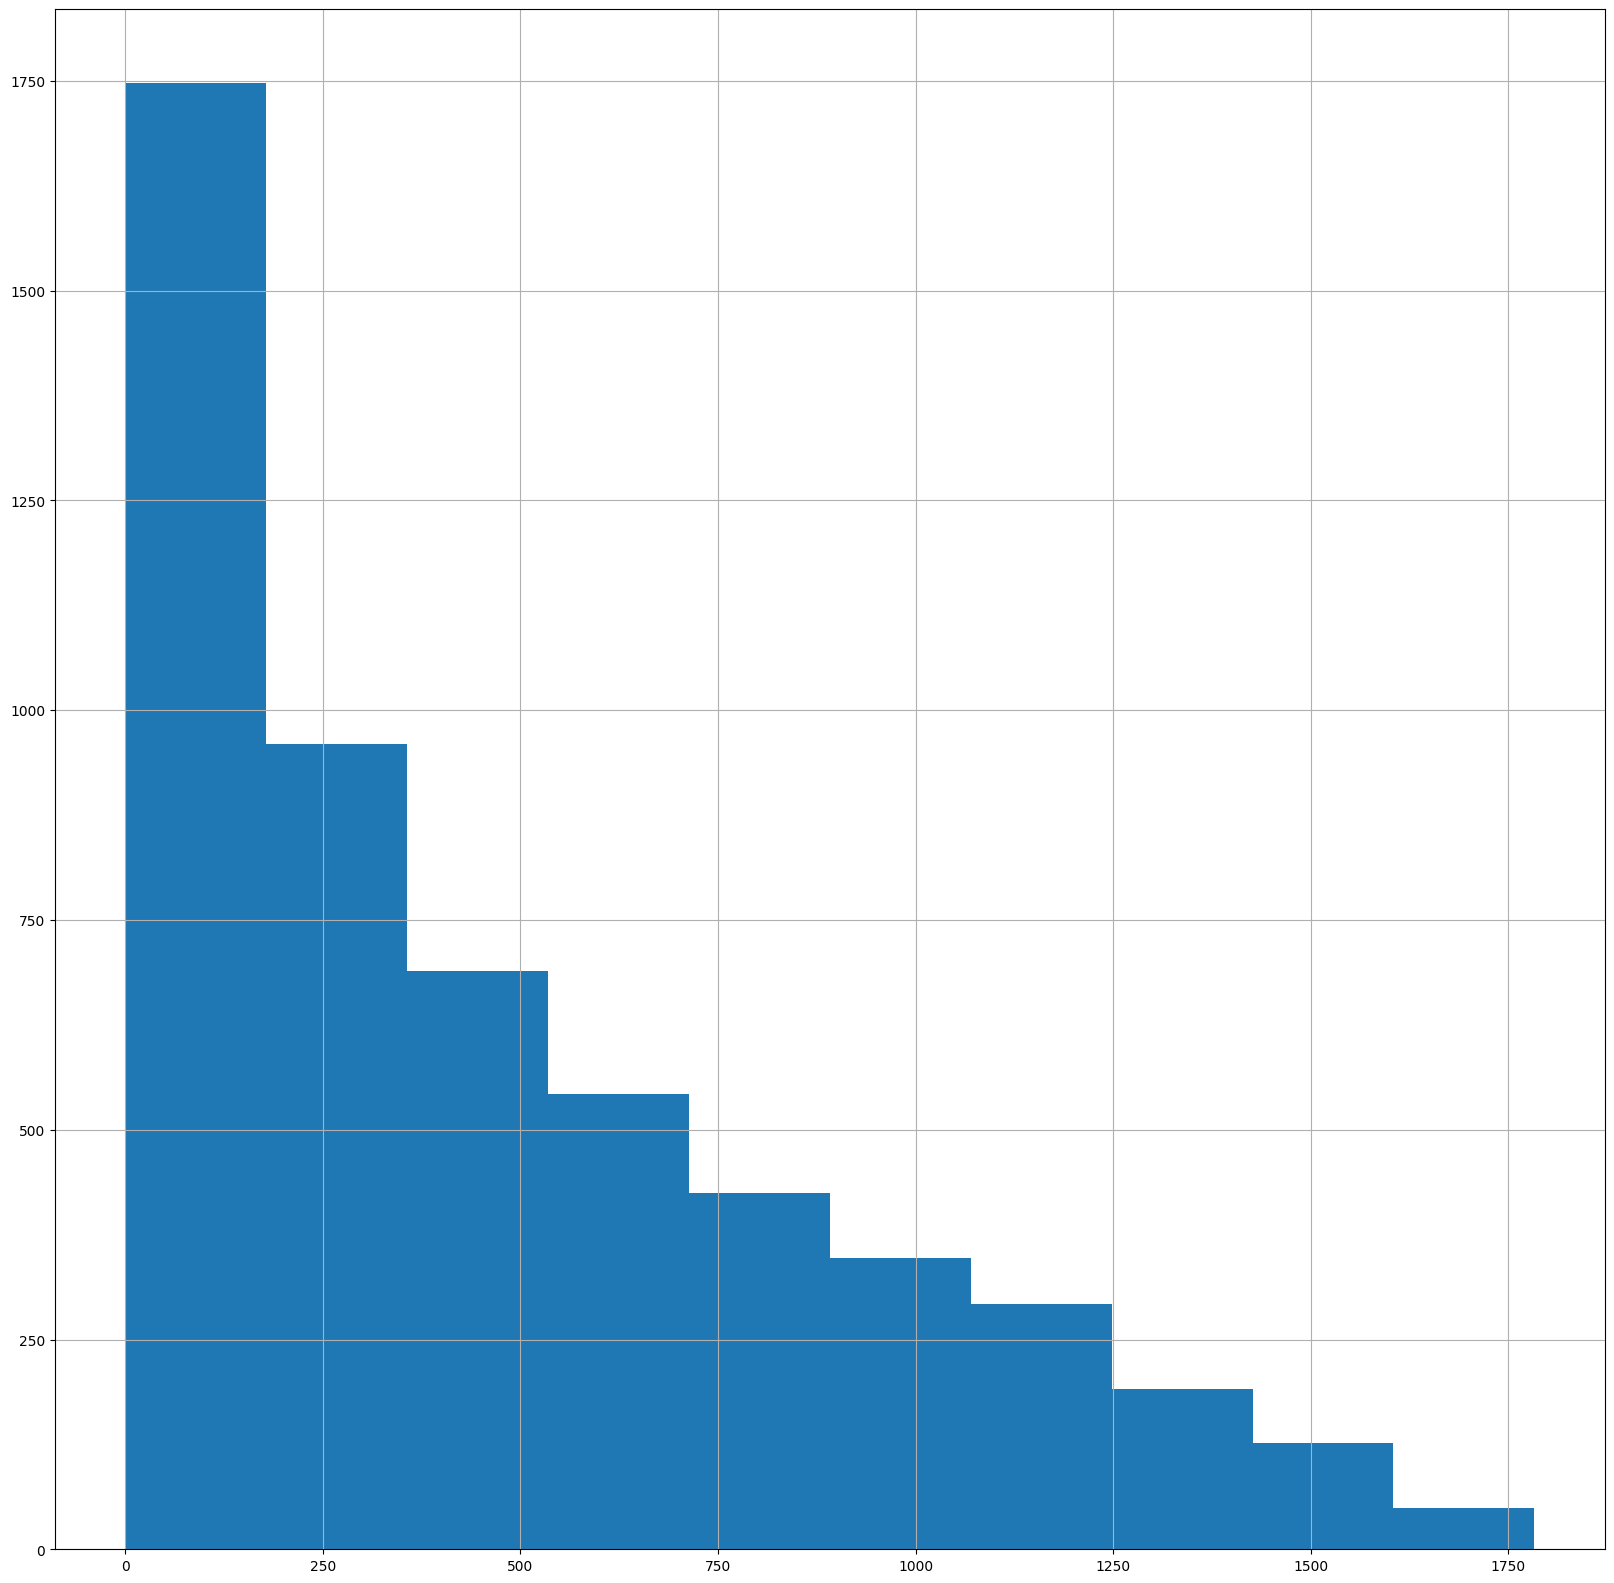

In [232]:
p = days_cares["DaysbetweenDeathandoperation"].hist(figsize=(20,20))

Dependent variable is highly skewed, let's try to normalize it

In [160]:
days_cares['DaysbetweenDeathandoperation'] = (days_cares['DaysbetweenDeathandoperation']-0)/(24-0)
print('DomainScaler:\n{}'.format(days_cares['DaysbetweenDeathandoperation'].describe()))

DomainScaler:
count    5373.000000
mean       19.859227
std        17.680380
min         0.000000
25%         4.958333
50%        14.666667
75%        31.166667
max        74.291667
Name: DaysbetweenDeathandoperation, dtype: float64


# Simple Modeling (lin reg, DT reg, ridge, lasso)

In [233]:
RANDOM_SEED = 623

In [234]:
np.random.seed(RANDOM_SEED)

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
'''
[
    'AGEcategory',
    'PreopEGFRMDRD',
    'Preoptransfusionwithin30days',
    'Intraop',
    'Postopwithin30days',
    'Transfusionintraandpostop'
]
'''

In [269]:
X = days_cares[['Preoptransfusionwithin30days','Intraop']]
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [270]:
# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3759, 2)
Shape of y_train: (3759,)
Shape of X_test: (1612, 2)
Shape of y_test: (1612,)


In [271]:
# Feature engineer the generated data X by adding polynomial features of degree N
# Initialise a list of degrees 
list_deg = [1, 3, 6, 9]
# Initial number of predicted values
num_points = 1612
# Initialise the 2D array to store the predicted values
degree_predictions = np.zeros((len(list_deg), num_points))

# Initialise lists to store MSE and R² values for each degree
mae_list = []
mse_list = []
r2_list = []

for i, N in enumerate(list_deg):
    # Initialise the polynomial feature transformer 
    poly = PolynomialFeatures(degree=N)
    
    # Fits and transforms the input train data and creates new features of degree N
    #X_train_ = poly.fit_transform(X_train)

    # Fits and transforms the input train data and creates new features of degree 1
    X_train_ = poly.fit_transform(X_train.values.reshape(-1, 1))
    
    # Instantiate a linear regressor
    linreg = LinearRegression()
    
    # Train the linear regressor with X_train data with polynomial features added of degree N
    linreg.fit(X_train_, y_train)
    
    # Transform the test data to include polynomial features of the same degree
    #X_test_ = poly.fit_transform(X_test)

    # Transform the test data to include polynomial features of the same degree
    X_test_ = poly.fit_transform(X_test.values.reshape(-1, 1))
    
    # Store the predicted values on the ith row
    y_pred = linreg.predict(X_test_)
    degree_predictions[i, :] = y_pred
    
    # Calculate and store the MSE and R² values
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    
    # Print MSE and R² for the current degree
    print(f"Degree {N}: MAE = {mae:.4f}, Degree {N}: MSE = {mse:.4f}, R² = {r2:.4f}")

# degree_predictions now contains the predictions for each degree of polynomial features
degree_predictions

ValueError: Found input variables with inconsistent numbers of samples: [7518, 3759]

From polynomial regression, seems like degree 1 (lin reg) performs the best

In [273]:
X_train.shape

(3759, 2)

In [275]:
# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=50)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation results
    print(f"\n{name} Evaluation:")
    print(f"Intercept: {model.intercept_}" if hasattr(model, 'intercept_') else "")
    print(f"Coefficient: {model.coef_}" if hasattr(model, 'coef_') else "")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Intercept: 510.99910499915524
Coefficient: [-36.67343657 -91.85422334]
Mean Absolute Error (MAE): 339.35
Mean Squared Error (MSE): 166369.76
Root Mean Squared Error (RMSE): 407.88
R-squared (R²): 0.02

Ridge Regression Evaluation:
Intercept: 510.9959642332499
Coefficient: [-36.6754208  -91.83769521]
Mean Absolute Error (MAE): 339.35
Mean Squared Error (MSE): 166369.76
Root Mean Squared Error (RMSE): 407.88
R-squared (R²): 0.02

Lasso Regression Evaluation:
Intercept: 510.870393491378
Coefficient: [-36.69732517 -91.24846391]
Mean Absolute Error (MAE): 339.35
Mean Squared Error (MSE): 166369.12
Root Mean Squared Error (RMSE): 407.88
R-squared (R²): 0.02

Decision Tree Regression Evaluation:


Mean Absolute Error (MAE): 338.60
Mean Squared Error (MSE): 166284.70
Root Mean Squared Error (RMSE): 407.78
R-squared (R²): 0.02


In [248]:
y_pred.shape

(1612,)

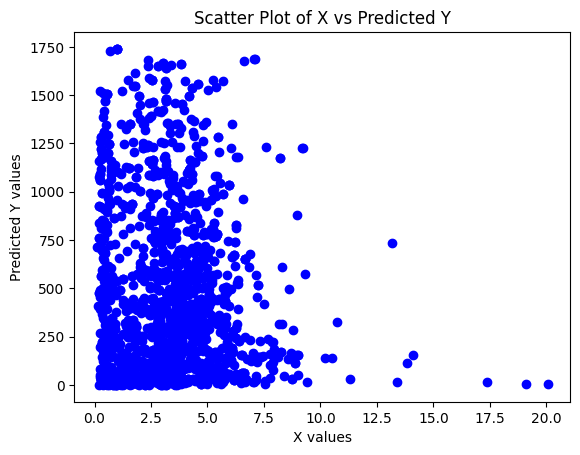

In [256]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X_test['PreopEGFRMDRD'], y_pred, color='blue', marker='o')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.title('Scatter Plot of X vs Predicted Y')

# Show the plot
plt.show()
